In [63]:
import pandas as pd

random_5_800_df = pd.read_pickle("random_5_800_df")
entropy_12_800_df = pd.read_pickle("entropy_12_800_df")
entropy_5_2_df = pd.read_pickle("entropy_5_2_df")

In [57]:
random_5_800_df

,Clicks,MAP@800,NDCG,Precision@800,R-Precision,Recall@800
0,"(19.171492463143945, 0.4982477049551618)","(0.005627410303500504, 0.00018548663877745563)","(0.07431364130108341, 0.0012162769555116941)","(0.0056636160344542, 0.0001739329360375442)","(0.005515748100761256, 0.00044375278285454215)","(0.23193144305858734, 0.003710631810077509)"
1,"(19.626233593620206, 0.5033332272126703)","(0.004311045988065067, 0.00014067457432227447)","(0.06792475354163016, 0.001224930328999198)","(0.004334814753281276, 0.00013142142279195544)","(0.0041437290091718955, 0.0004439043280856824)","(0.23152233695224633, 0.004335216622777486)"
2,"(19.864923747276688, 0.5083188611098515)","(0.003352997577112294, 0.00011639545948108672)","(0.0613486286978211, 0.0012598211202872467)","(0.0033140606670018433, 0.00010450059014439917)","(0.0033143404656902566, 0.0004385508799594365)","(0.22804710268848566, 0.005029422285693739)"
3,"(20.31703146374829, 0.5169302118803473)","(0.0026497146540115524, 9.47356052238105e-05)","(0.056971828460197424, 0.0012704484409951382)","(0.0026528300273597812, 8.360449492640609e-05)","(0.0022959300680607856, 0.00037548284757260515)","(0.2311712170823277, 0.0055416652110662715)"
4,"(20.626447298961818, 0.5358178614396574)","(0.0020106931052956004, 7.423455447662371e-05)","(0.051637012790317266, 0.0013076838768182936)","(0.0020172004223121594, 6.415556278076944e-05)","(0.002087113531338626, 0.000511008839619905)","(0.22822107833636582, 0.006094915830926003)"


In [58]:
entropy_12_800_df

,Clicks,MAP@800,NDCG,Precision@800,R-Precision,Recall@800
0,"(3.42864005300646, 0.20093691546142775)","(0.026418606553341776, 0.0005663322932409659)","(0.27510920476107936, 0.0037176158487689233)","(0.013829923803213517, 0.00036654269282350357)","(0.07926826138670329, 0.0026340957035622275)","(0.587268260647485, 0.005954200087659187)"
1,"(21.199945799457993, 0.5065568348248786)","(0.002590293843020575, 0.00010134784164871612)","(0.06637129303184852, 0.0016287586363100302)","(0.0029742547425474254, 0.00010381732255453756)","(0.0006477504486788357, 0.0002448635275329654)","(0.2867030716716821, 0.007301051429536813)"
2,"(18.83810267421433, 0.5877374142971838)","(0.0005245265987129687, 3.898805785337534e-05)","(0.020346250603656003, 0.0009734943477746548)","(0.0009135272301385908, 4.8826897522573626e-05)","(0.00016187642578429227, 0.0001447253259244391)","(0.09572241898573747, 0.004832142794749212)"
3,"(11.420163054285146, 0.45936145059901745)","(0.00013581395220015608, 2.3579004608462746e-05)","(0.006481106008128839, 0.0005433604640690219)","(0.00029131039968184527, 2.604238031431689e-05)","(2.909951549306704e-05, 5.2046665378830405e-05)","(0.031707437326304336, 0.0029067308692465772)"
4,"(7.4310186111667, 0.2953416940603204)","(4.405449042717317e-05, 1.0307906255482553e-05)","(0.0022122977334588533, 0.0003092344794544136)","(0.00010906543926355814, 1.6807479912359327e-05)","(3.335334534053765e-05, 5.946482320752186e-05)","(0.010754677198783954, 0.0016894918915799327)"
5,"(6.023846770958684, 0.196530324783265)","(1.3783464661357543e-05, 4.671691630301006e-06)","(0.0007100360107770072, 0.00015996362734525203)","(3.760529482551143e-05, 8.442551938267336e-06)","(0.0, 0.0)","(0.003300485359207798, 0.0008275618508627509)"
6,"(5.347843530591775, 0.11761233441043945)","(4.36747376060552e-06, 2.7451038630537408e-06)","(0.00025650657379088193, 0.00010682076323061022)","(1.629889669007021e-05, 7.394060848434406e-06)","(0.0, 0.0)","(0.0011125280964798744, 0.0004783862773149862)"
7,"(5.0729989969909735, 0.04907610483476553)","(1.2450062882703842e-06, 1.0045643735115602e-06)","(5.980033752113368e-05, 4.323121003547386e-05)","(3.7612838515546637e-06, 2.563579053927091e-06)","(0.0, 0.0)","(0.0002486923429669701, 0.0001931243583577531)"
8,"(5.0293681043129395, 0.03498659257228365)","(1.0436656366676408e-06, 1.77796494782255e-06)","(2.419970376537029e-05, 3.352190113863584e-05)","(2.0060180541624876e-06, 2.1871389664991026e-06)","(0.0, 0.0)","(7.544099727136272e-05, 0.00011125710225740515)"
9,"(5.022126379137412, 0.02905695151395937)","(2.8597814232200255e-07, 4.896906408520014e-07)","(1.2129163469305121e-05, 1.913946093436865e-05)","(7.522567703109327e-07, 9.983746115733405e-07)","(0.0, 0.0)","(4.809750890097192e-05, 7.96275275770007e-05)"


In [59]:
entropy_12_800_df.columns = ["Clicks", "MAP@800", "NDCG", "Precision@800", "R-Precision", "Recall@800"]
# entropy_20_20_df_copy = entropy_12_800_df.reset_index()
entropy_12_800_df_copy = entropy_12_800_df
# entropy_20_20_df_copy['MAP@20_ci'] = entropy_12_800_df_copy['MAP@20'].apply(lambda x: x[1])
entropy_12_800_df_copy['MAP@800'] = entropy_12_800_df_copy['MAP@800'].apply(lambda x: x[0])
# entropy_20_20_df_copy['NDCG_ci'] = entropy_12_800_df_copy['NDCG'].apply(lambda x: x[1])
entropy_12_800_df_copy['NDCG'] = entropy_12_800_df_copy['NDCG'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Precision@20_ci'] = entropy_12_800_df_copy['Precision@20'].apply(lambda x: x[1])
entropy_12_800_df_copy['Precision@800'] = entropy_12_800_df_copy['Precision@800'].apply(lambda x: x[0])
# entropy_20_20_df_copy['R-Precision_ci'] = entropy_12_800_df_copy['R-Precision'].apply(lambda x: x[1])
entropy_12_800_df_copy['R-Precision'] = entropy_12_800_df_copy['R-Precision'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Recall@20_ci'] = entropy_12_800_df_copy['Recall@20'].apply(lambda x: x[1])
entropy_12_800_df_copy['Recall@800'] = entropy_12_800_df_copy['Recall@800'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Clicks_ci'] = entropy_12_800_df_copy['Clicks'].apply(lambda x: x[1])
entropy_12_800_df_copy['Clicks'] = entropy_12_800_df_copy['Clicks'].apply(lambda x: x[0])
entropy_12_800_df_copy

,Clicks,MAP@800,NDCG,Precision@800,R-Precision,Recall@800
0,3.428640,2.641861e-02,0.275109,1.382992e-02,0.079268,0.587268
1,21.199946,2.590294e-03,0.066371,2.974255e-03,0.000648,0.286703
2,18.838103,5.245266e-04,0.020346,9.135272e-04,0.000162,0.095722
3,11.420163,1.358140e-04,0.006481,2.913104e-04,0.000029,0.031707
4,7.431019,4.405449e-05,0.002212,1.090654e-04,0.000033,0.010755
5,6.023847,1.378346e-05,0.000710,3.760529e-05,0.000000,0.003300
6,5.347844,4.367474e-06,0.000257,1.629890e-05,0.000000,0.001113
7,5.072999,1.245006e-06,0.000060,3.761284e-06,0.000000,0.000249
8,5.029368,1.043666e-06,0.000024,2.006018e-06,0.000000,0.000075
9,5.022126,2.859781e-07,0.000012,7.522568e-07,0.000000,0.000048


In [60]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

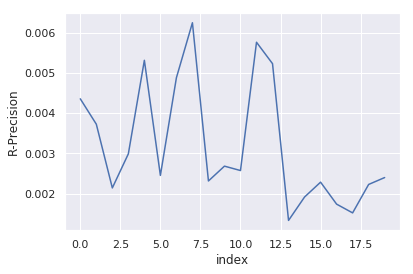

In [23]:
# sns.lineplot(x='index', y="R-Precision", data=entropy_20_20_df_copy)

[[<matplotlib.axis.XTick at 0x7f1946567fd0>,

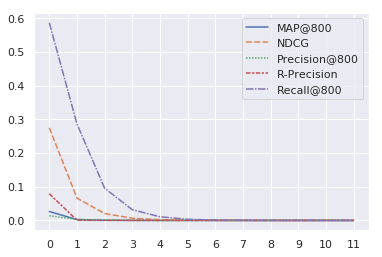

In [62]:
import numpy as np
ax = sns.lineplot(data=entropy_12_800_df_copy[["MAP@800", "NDCG", "Precision@800", "R-Precision", "Recall@800"]])
ax.set(xticks=np.arange(0,12,1))

In [50]:
random_5_800_df.columns = ["Clicks", "MAP@800", "NDCG", "Precision@800", "R-Precision", "Recall@800"]
# random_5_800_df_copy = random_5_800_df
# random_5_800_df_copy["Random_MAP@800"] = random_5_800_df_copy["MAP@800"].apply(lambda x: x[0])
# random_5_800_df['Random_NDCG'] = random_5_800_df['NDCG'].apply(lambda x: x[0])
# random_5_800_df['Random_Precision@800'] = random_5_800_df['Precision@800'].apply(lambda x: x[0])
# random_5_800_df['Random_R-Precision'] = random_5_800_df['R-Precision'].apply(lambda x: x[0])
# random_5_800_df['Random_Recall@800'] = random_5_800_df['Recall@800'].apply(lambda x: x[0])
random_5_800_df_copy

,Clicks,MAP@800,NDCG,Precision@800,R-Precision,Recall@800
0,19.171492,0.005627,0.074314,0.005664,0.005516,0.231931
1,19.626234,0.004311,0.067925,0.004335,0.004144,0.231522
2,19.864924,0.003353,0.061349,0.003314,0.003314,0.228047
3,20.317031,0.002650,0.056972,0.002653,0.002296,0.231171
4,20.626447,0.002011,0.051637,0.002017,0.002087,0.228221


In [51]:
0.5844369509081928 / 0.231931

2.5198742337513864

In [52]:
0.026458777389905565 / 0.005627

4.702110785481707

In [53]:
0.013820606261388107 / 0.005664

2.440078789086883

In [54]:
0.07973299050105692 / 0.005516

14.454856871112566

In [55]:
0.27369153044611366 / 0.074314

3.682906726136578

In [ ]:
Recall@800:(0.5844369509081928, 0.005977655961903462)
MAP@800:(0.026458777389905565, 0.0005757470357630799)
Precision@800:(0.013820606261388107, 0.00036972230351024516)
Clicks:(3.382358787477224, 0.19734634486176747)
R-Precision:(0.07973299050105692, 0.002663427851492664)
NDCG:(0.27369153044611366, 0.0037461587044595357)

In [64]:
entropy_5_2_df.columns = ["Clicks", "MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]
# entropy_20_20_df_copy = entropy_12_800_df.reset_index()
entropy_5_2_df_copy = entropy_5_2_df
# entropy_20_20_df_copy['MAP@20_ci'] = entropy_12_800_df_copy['MAP@20'].apply(lambda x: x[1])
entropy_5_2_df_copy['MAP@2'] = entropy_5_2_df_copy['MAP@2'].apply(lambda x: x[0])
# entropy_20_20_df_copy['NDCG_ci'] = entropy_12_800_df_copy['NDCG'].apply(lambda x: x[1])
entropy_5_2_df_copy['NDCG'] = entropy_5_2_df_copy['NDCG'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Precision@20_ci'] = entropy_12_800_df_copy['Precision@20'].apply(lambda x: x[1])
entropy_5_2_df_copy['Precision@2'] = entropy_5_2_df_copy['Precision@2'].apply(lambda x: x[0])
# entropy_20_20_df_copy['R-Precision_ci'] = entropy_12_800_df_copy['R-Precision'].apply(lambda x: x[1])
entropy_5_2_df_copy['R-Precision'] = entropy_5_2_df_copy['R-Precision'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Recall@20_ci'] = entropy_12_800_df_copy['Recall@20'].apply(lambda x: x[1])
entropy_5_2_df_copy['Recall@2'] = entropy_5_2_df_copy['Recall@2'].apply(lambda x: x[0])
# entropy_20_20_df_copy['Clicks_ci'] = entropy_12_800_df_copy['Clicks'].apply(lambda x: x[1])
entropy_5_2_df_copy['Clicks'] = entropy_5_2_df_copy['Clicks'].apply(lambda x: x[0])
entropy_5_2_df_copy

,Clicks,MAP@2,NDCG,Precision@2,R-Precision,Recall@2
0,4.141461,0.094625,0.034063,0.093838,0.021799,0.021799
1,4.842561,0.011928,0.005204,0.016236,0.003809,0.003809
2,4.962552,0.002403,0.001251,0.003811,0.000898,0.001064
3,4.992674,0.000456,0.000178,0.000746,0.000134,0.000134
4,4.997563,0.000124,0.000068,0.000249,0.000064,0.000064
5,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000


[[<matplotlib.axis.XTick at 0x7f1944ba3cc0>,

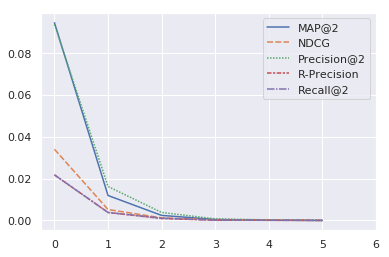

In [66]:
ax = sns.lineplot(data=entropy_5_2_df_copy[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,7,1))

[[<matplotlib.axis.XTick at 0x7f193fb61240>,

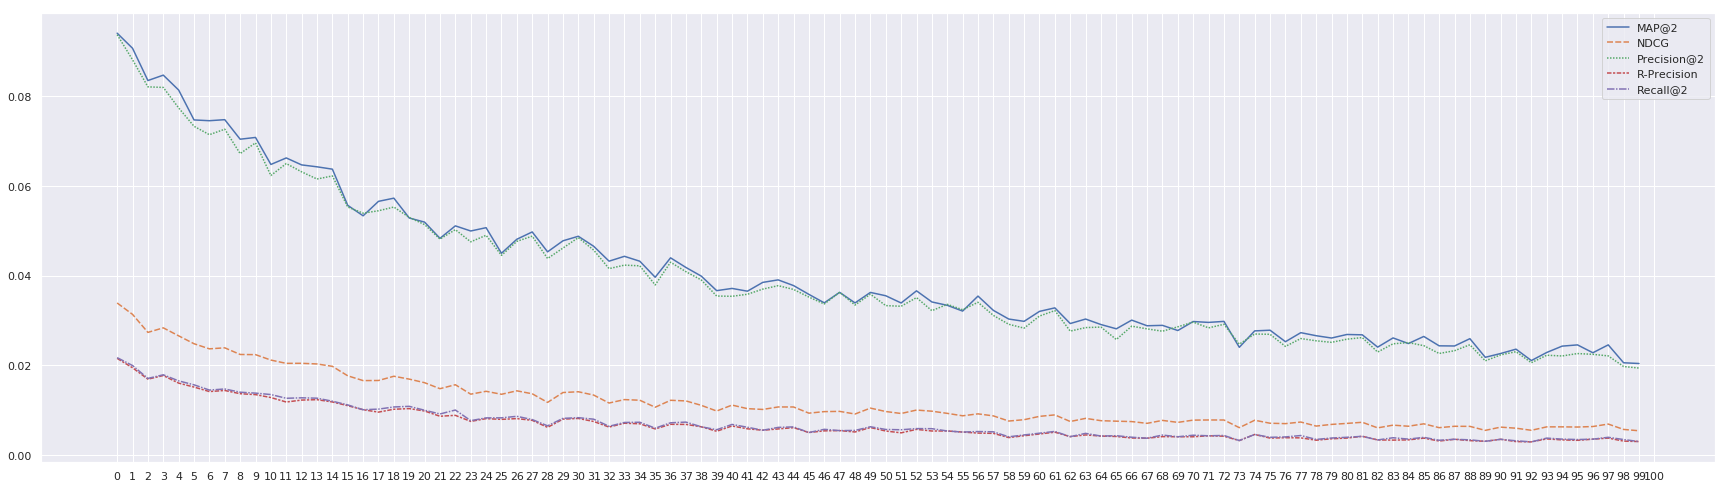

In [77]:
entropy_100_2_df = pd.read_pickle("entropy_100_2_df")
entropy_100_2_df.columns = ["Clicks", "MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]

entropy_100_2_df['MAP@2'] = entropy_100_2_df['MAP@2'].apply(lambda x: x[0])
entropy_100_2_df['NDCG'] = entropy_100_2_df['NDCG'].apply(lambda x: x[0])
entropy_100_2_df['Precision@2'] = entropy_100_2_df['Precision@2'].apply(lambda x: x[0])
entropy_100_2_df['R-Precision'] = entropy_100_2_df['R-Precision'].apply(lambda x: x[0])
entropy_100_2_df['Recall@2'] = entropy_100_2_df['Recall@2'].apply(lambda x: x[0])
entropy_100_2_df['Clicks'] = entropy_100_2_df['Clicks'].apply(lambda x: x[0])
entropy_100_2_df

fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_100_2_df[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

[[<matplotlib.axis.XTick at 0x7f193fdcc5c0>,

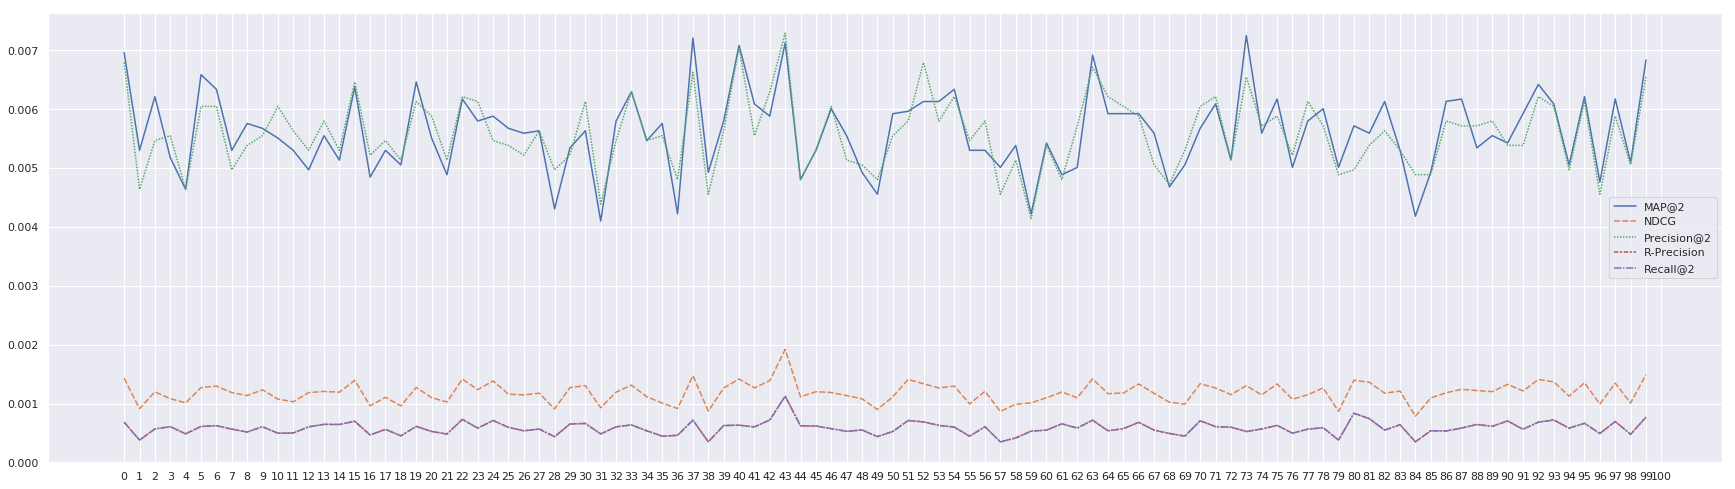

In [79]:
random_100_2_df = pd.read_pickle("random_100_2_df")
random_100_2_df.columns = ["Clicks", "MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]

random_100_2_df['MAP@2'] = random_100_2_df['MAP@2'].apply(lambda x: x[0])
random_100_2_df['NDCG'] = random_100_2_df['NDCG'].apply(lambda x: x[0])
random_100_2_df['Precision@2'] = random_100_2_df['Precision@2'].apply(lambda x: x[0])
random_100_2_df['R-Precision'] = random_100_2_df['R-Precision'].apply(lambda x: x[0])
random_100_2_df['Recall@2'] = random_100_2_df['Recall@2'].apply(lambda x: x[0])
random_100_2_df['Clicks'] = random_100_2_df['Clicks'].apply(lambda x: x[0])
random_100_2_df

fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=random_100_2_df[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

In [80]:
entropy_100_2_df

,Clicks,MAP@2,NDCG,Precision@2,R-Precision,Recall@2
0,4.136690,0.094086,0.033930,0.093755,0.021578,0.021744
1,4.191732,0.090721,0.031392,0.088152,0.019487,0.019984
2,4.245289,0.083527,0.027374,0.082117,0.016946,0.017112
3,4.234091,0.084730,0.028388,0.081992,0.017756,0.017922
4,4.276690,0.081409,0.026608,0.077421,0.016063,0.016562
5,4.316944,0.074742,0.024845,0.073329,0.015184,0.015683
6,4.330311,0.074572,0.023708,0.071452,0.014183,0.014516
7,4.333100,0.074800,0.023933,0.072677,0.014423,0.014756
8,4.370438,0.070447,0.022451,0.067239,0.013704,0.014037
9,4.352919,0.070839,0.022412,0.069630,0.013499,0.013833


In [81]:
random_100_2_df

,Clicks,MAP@2,NDCG,Precision@2,R-Precision,Recall@2
0,4.932731,0.006957,0.001433,0.006791,0.000687,0.000687
1,4.953951,0.005301,0.000916,0.004638,0.000384,0.000384
2,4.946546,0.006212,0.001202,0.005466,0.000574,0.000574
3,4.945138,0.005176,0.001087,0.005549,0.000611,0.000611
4,4.954083,0.004638,0.001015,0.004638,0.000490,0.000490
5,4.940036,0.006584,0.001275,0.006046,0.000615,0.000615
6,4.940898,0.006336,0.001300,0.006046,0.000628,0.000628
7,4.950737,0.005301,0.001190,0.004969,0.000570,0.000570
8,4.947441,0.005756,0.001139,0.005383,0.000520,0.000520
9,4.945039,0.005673,0.001236,0.005549,0.000611,0.000611


In [84]:
entropy_random_100_2_df = pd.concat([entropy_100_2_df, random_100_2_df], axis=1)
entropy_random_100_2_df.columns = ["entropy_Clicks", "entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                  "random_Clicks", "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2"]
entropy_random_100_2_df

,entropy_Clicks,entropy_MAP@2,entropy_NDCG,entropy_Precision@2,entropy_R-Precision,entropy_Recall@2,random_Clicks,random_MAP@2,random_NDCG,random_Precision@2,random_R-Precision,random_Recall@2
0,4.136690,0.094086,0.033930,0.093755,0.021578,0.021744,4.932731,0.006957,0.001433,0.006791,0.000687,0.000687
1,4.191732,0.090721,0.031392,0.088152,0.019487,0.019984,4.953951,0.005301,0.000916,0.004638,0.000384,0.000384
2,4.245289,0.083527,0.027374,0.082117,0.016946,0.017112,4.946546,0.006212,0.001202,0.005466,0.000574,0.000574
3,4.234091,0.084730,0.028388,0.081992,0.017756,0.017922,4.945138,0.005176,0.001087,0.005549,0.000611,0.000611
4,4.276690,0.081409,0.026608,0.077421,0.016063,0.016562,4.954083,0.004638,0.001015,0.004638,0.000490,0.000490
5,4.316944,0.074742,0.024845,0.073329,0.015184,0.015683,4.940036,0.006584,0.001275,0.006046,0.000615,0.000615
6,4.330311,0.074572,0.023708,0.071452,0.014183,0.014516,4.940898,0.006336,0.001300,0.006046,0.000628,0.000628
7,4.333100,0.074800,0.023933,0.072677,0.014423,0.014756,4.950737,0.005301,0.001190,0.004969,0.000570,0.000570
8,4.370438,0.070447,0.022451,0.067239,0.013704,0.014037,4.947441,0.005756,0.001139,0.005383,0.000520,0.000520
9,4.352919,0.070839,0.022412,0.069630,0.013499,0.013833,4.945039,0.005673,0.001236,0.005549,0.000611,0.000611


[[<matplotlib.axis.XTick at 0x7f194402def0>,

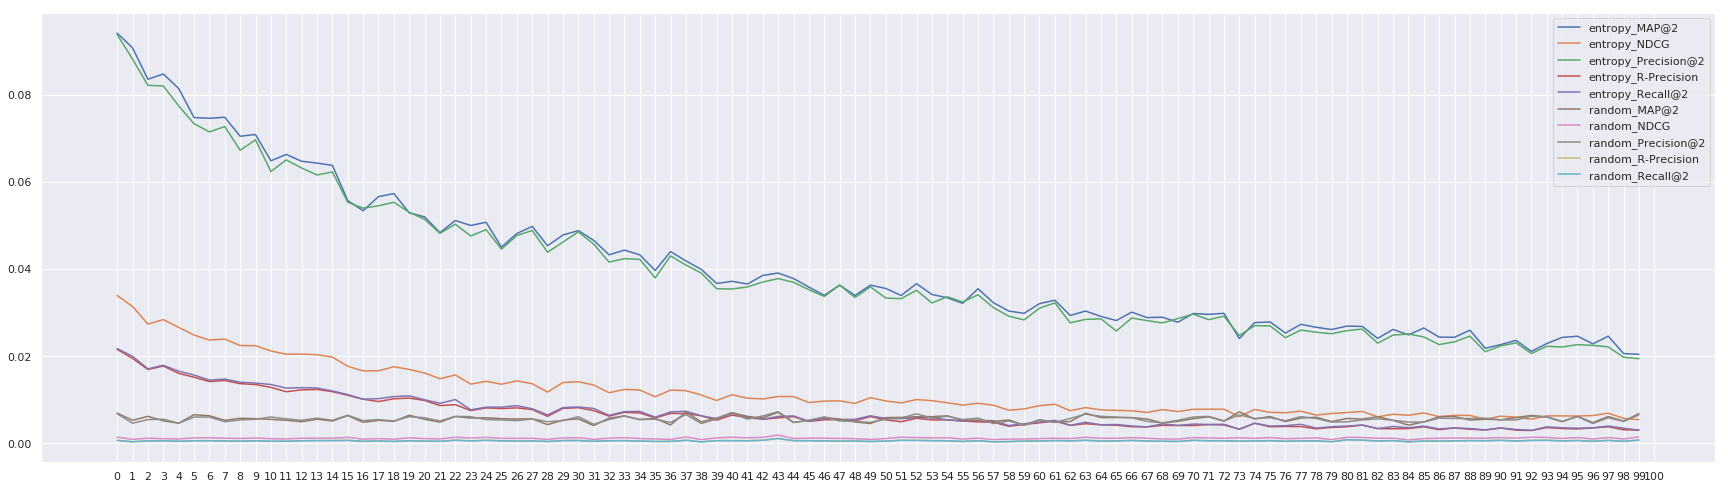

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                                "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2"]],
                  dashes=False)
ax.set(xticks=np.arange(0,101,1))

# fig.savefig("entropy_random_100times_2items_per_time.png")

[[<matplotlib.axis.XTick at 0x7f193f3c2438>,

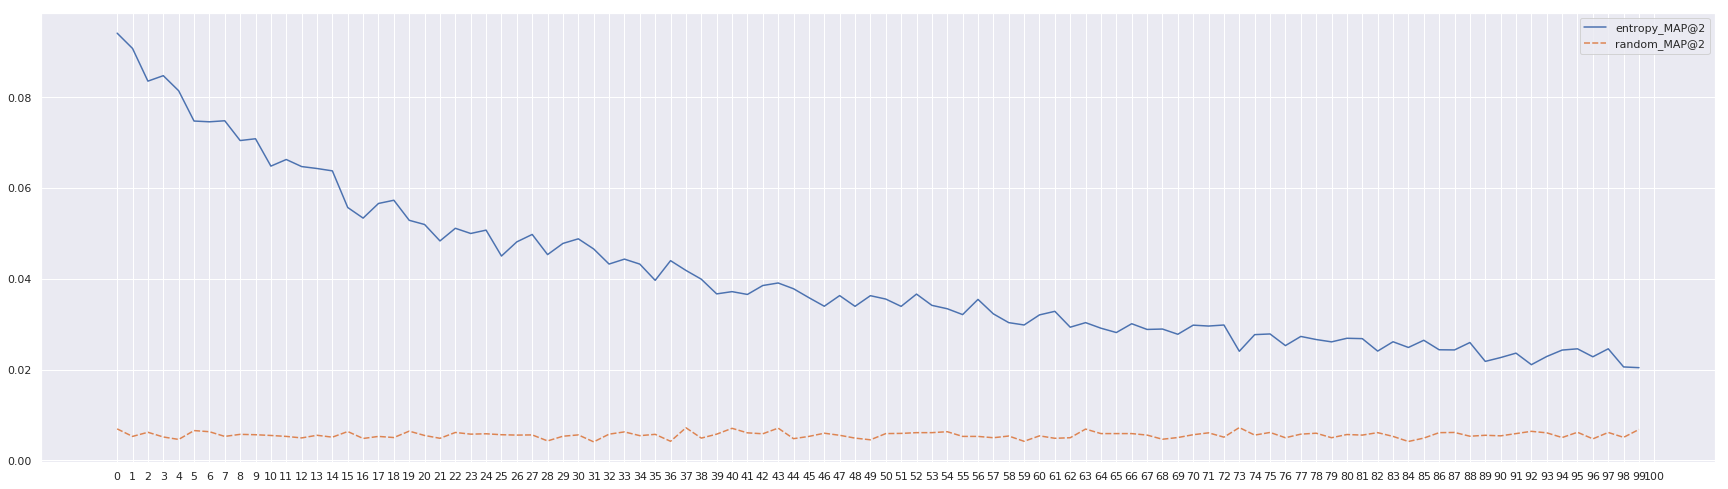

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_MAP@2", "random_MAP@2"]])
ax.set(xticks=np.arange(0,101,1))

# fig.savefig("entropy_random_100times_2items_per_time_MAP@2.png")

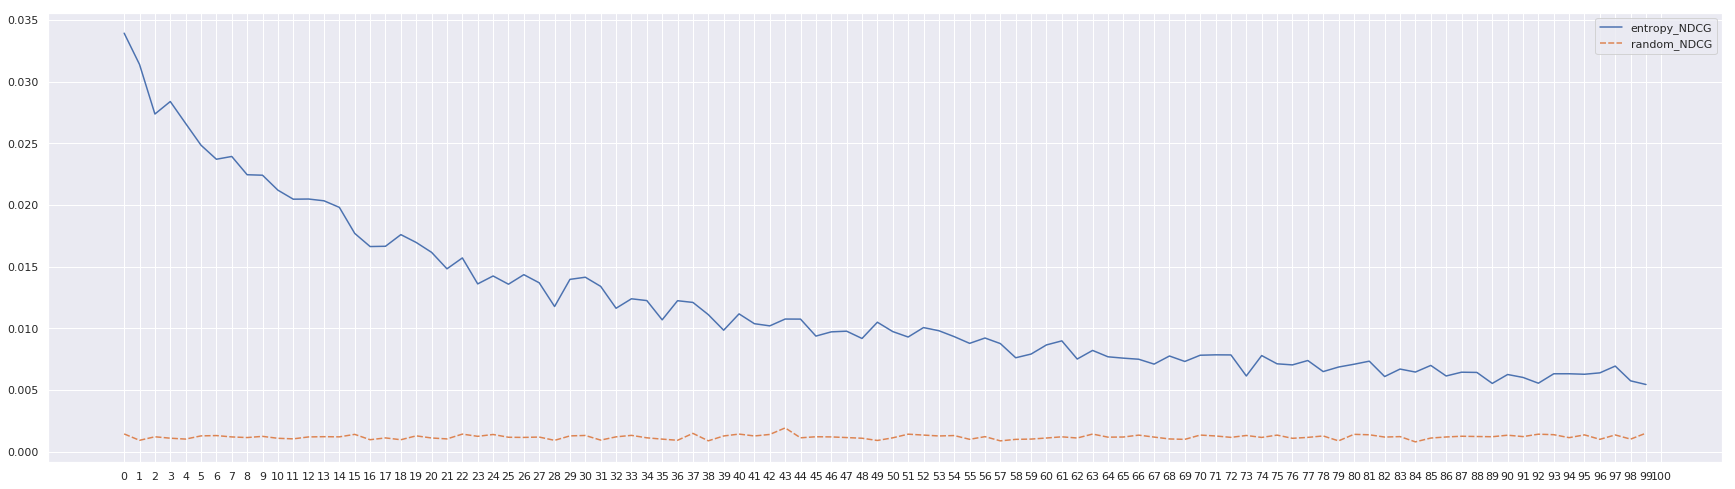

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_NDCG", "random_NDCG"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_NDCG.png")

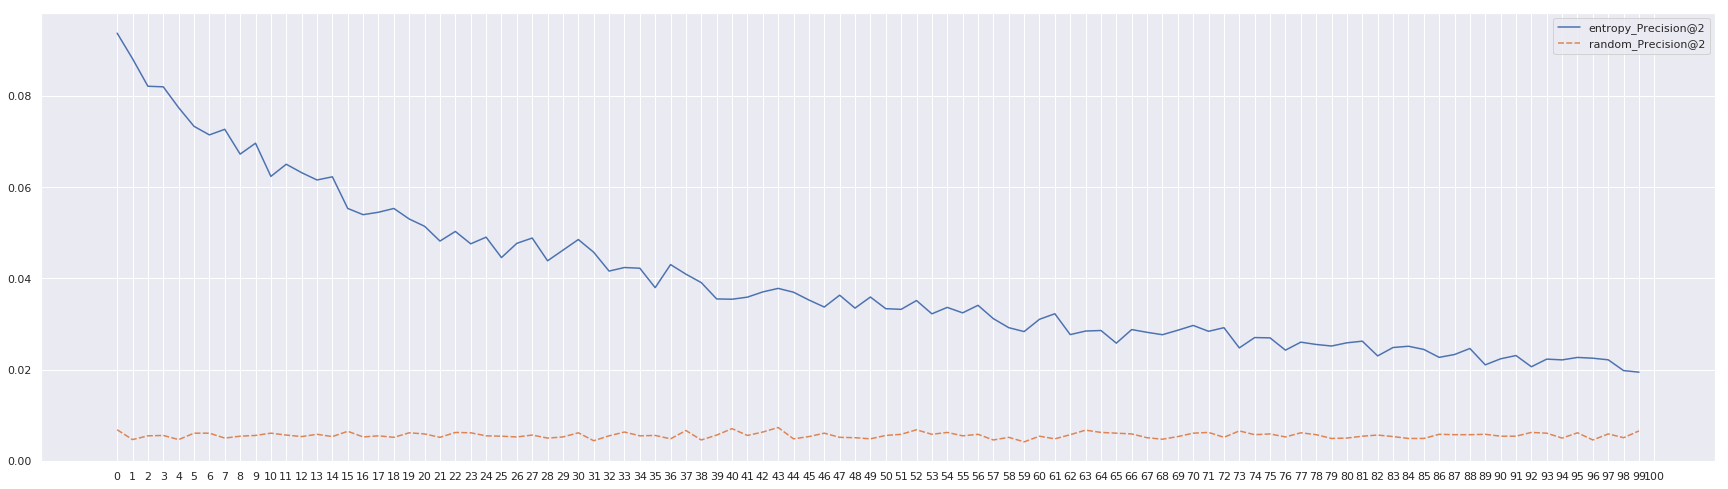

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_Precision@2", "random_Precision@2"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Precision@2.png")

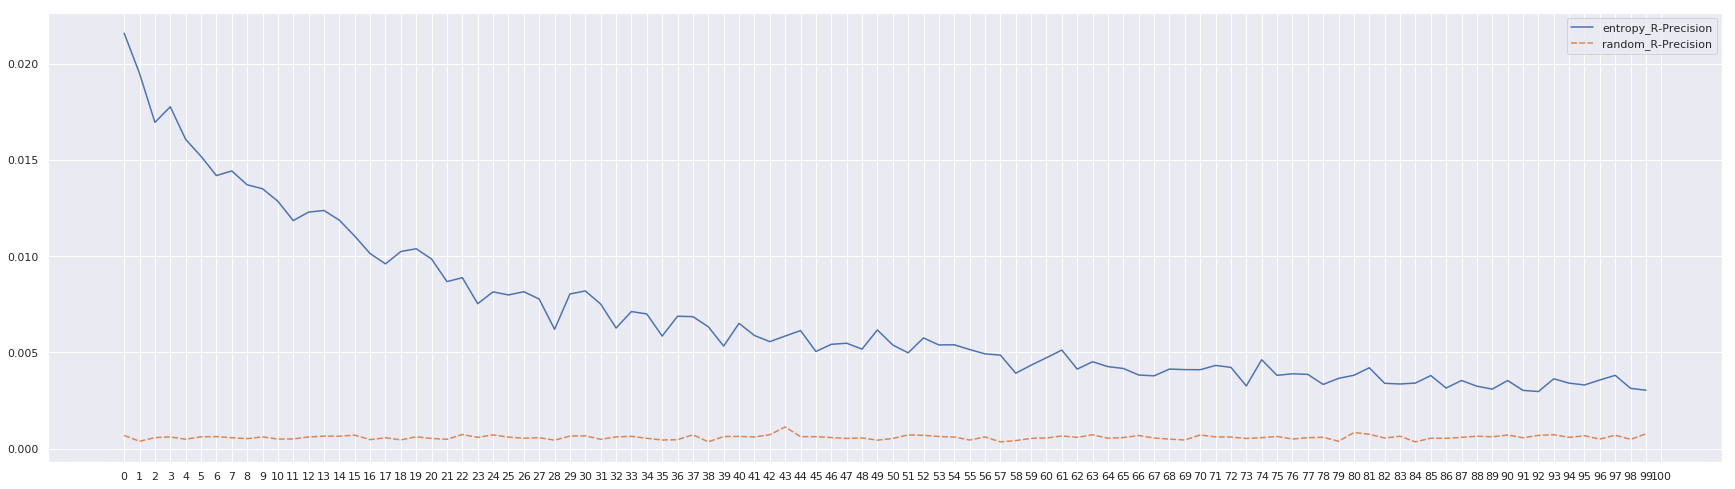

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_R-Precision", "random_R-Precision"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_R-Precision.png")

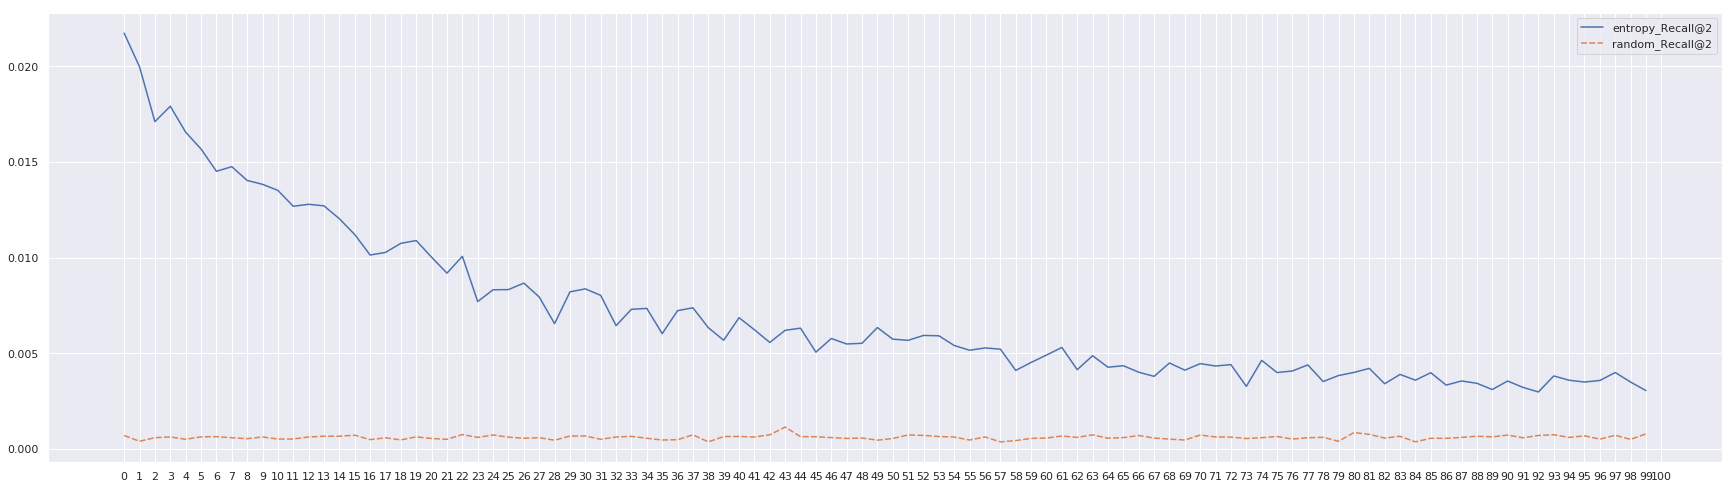

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_Recall@2", "random_Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Recall@2.png")

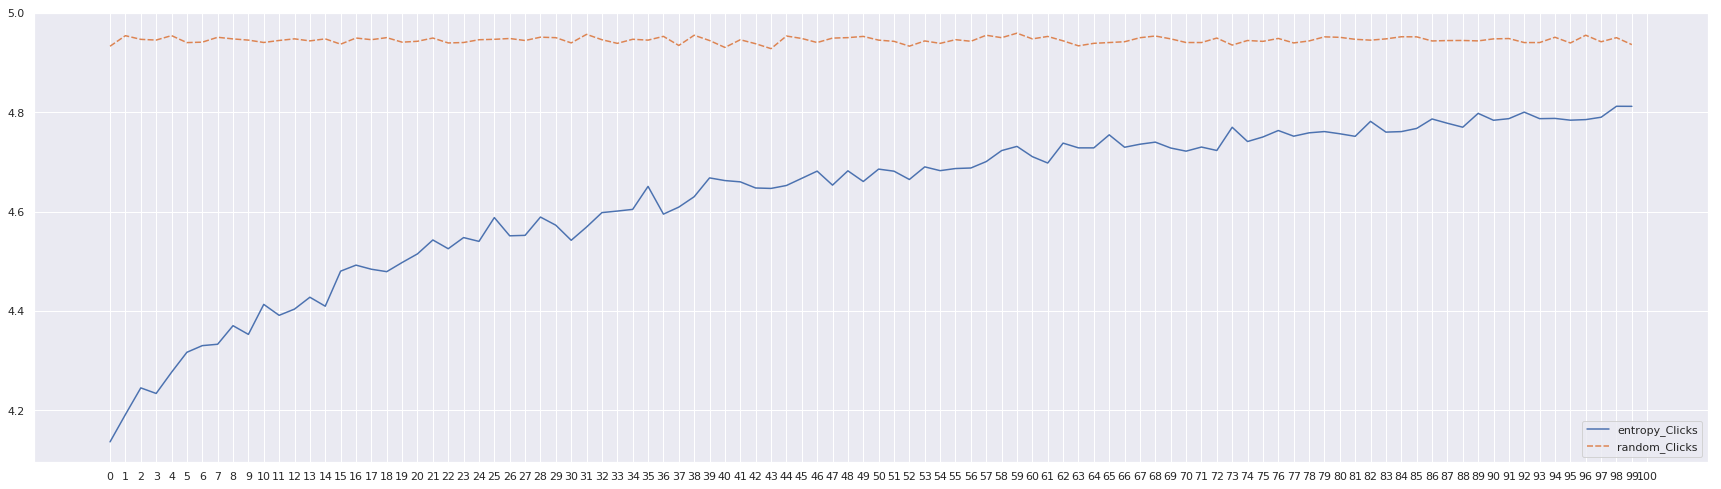

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_Clicks", "random_Clicks"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Clicks.png")

[[<matplotlib.axis.XTick at 0x7f193e8776a0>,

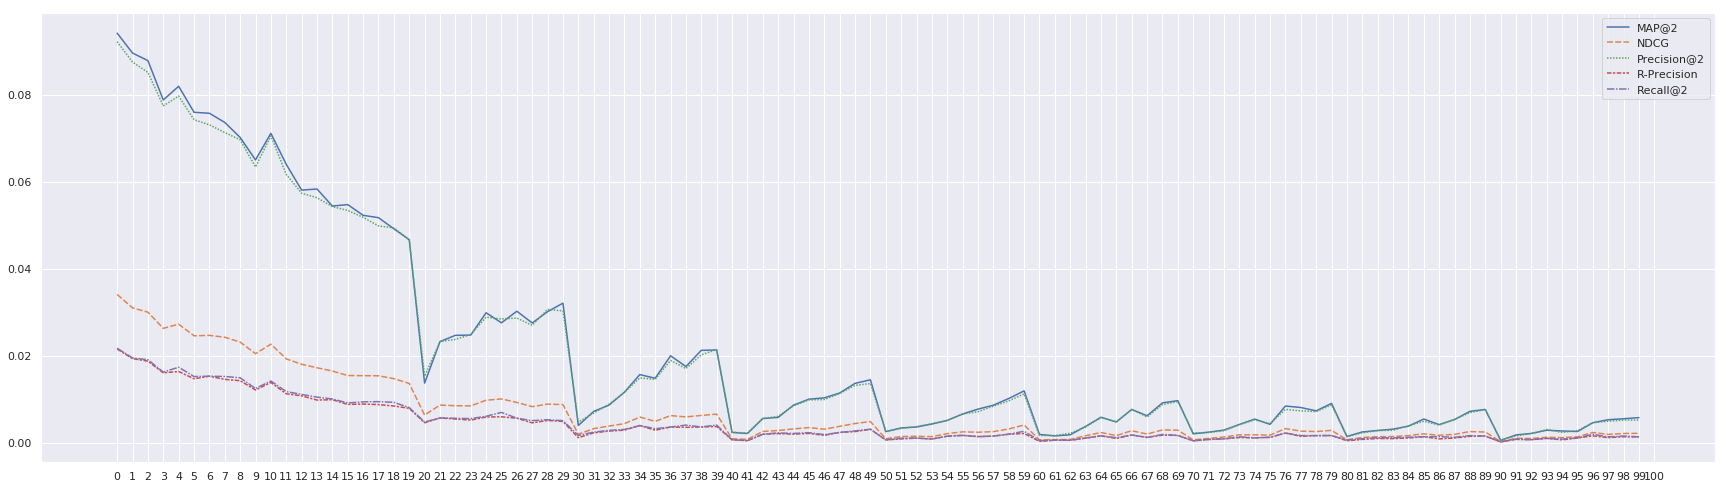

In [106]:
entropy_100_2_retrain_every_10times_df = pd.read_pickle("entropy_100_2_retrain_every_10times_df")
entropy_100_2_retrain_every_10times_df.columns = ["Clicks", "MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]

entropy_100_2_retrain_every_10times_df['MAP@2'] = entropy_100_2_retrain_every_10times_df['MAP@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['NDCG'] = entropy_100_2_retrain_every_10times_df['NDCG'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['Precision@2'] = entropy_100_2_retrain_every_10times_df['Precision@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['R-Precision'] = entropy_100_2_retrain_every_10times_df['R-Precision'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['Recall@2'] = entropy_100_2_retrain_every_10times_df['Recall@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['Clicks'] = entropy_100_2_retrain_every_10times_df['Clicks'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df

fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_100_2_retrain_every_10times_df[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

In [108]:
entropy_random_100_2_with_retrain_df = pd.concat([entropy_random_100_2_df, entropy_100_2_retrain_every_10times_df], axis=1)
entropy_random_100_2_with_retrain_df.columns = ["entropy_Clicks", "entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                                "random_Clicks", "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2",
                                                "entropy_Clicks_retrain", "entropy_MAP@2_retrain", "entropy_NDCG_retrain", "entropy_Precision@2_retrain", "entropy_R-Precision_retrain", "entropy_Recall@2_retrain"]
entropy_random_100_2_with_retrain_df

,entropy_Clicks,entropy_MAP@2,entropy_NDCG,entropy_Precision@2,entropy_R-Precision,entropy_Recall@2,random_Clicks,random_MAP@2,random_NDCG,random_Precision@2,random_R-Precision,random_Recall@2,entropy_Clicks_retrain,entropy_MAP@2_retrain,entropy_NDCG_retrain,entropy_Precision@2_retrain,entropy_R-Precision_retrain,entropy_Recall@2_retrain
0,4.136690,0.094086,0.033930,0.093755,0.021578,0.021744,4.932731,0.006957,0.001433,0.006791,0.000687,0.000687,4.161686,0.094128,0.034118,0.092182,0.021599,0.021765
1,4.191732,0.090721,0.031392,0.088152,0.019487,0.019984,4.953951,0.005301,0.000916,0.004638,0.000384,0.000384,4.186214,0.089561,0.031026,0.087490,0.019369,0.019534
2,4.245289,0.083527,0.027374,0.082117,0.016946,0.017112,4.946546,0.006212,0.001202,0.005466,0.000574,0.000574,4.218418,0.087823,0.030048,0.085129,0.018796,0.019128
3,4.234091,0.084730,0.028388,0.081992,0.017756,0.017922,4.945138,0.005176,0.001087,0.005549,0.000611,0.000611,4.274793,0.078784,0.026330,0.077415,0.016109,0.016275
4,4.276690,0.081409,0.026608,0.077421,0.016063,0.016562,4.954083,0.004638,0.001015,0.004638,0.000490,0.000490,4.256948,0.081936,0.027293,0.079695,0.016413,0.017409
5,4.316944,0.074742,0.024845,0.073329,0.015184,0.015683,4.940036,0.006584,0.001275,0.006046,0.000615,0.000615,4.306087,0.075960,0.024617,0.074256,0.014759,0.015258
6,4.330311,0.074572,0.023708,0.071452,0.014183,0.014516,4.940898,0.006336,0.001300,0.006046,0.000628,0.000628,4.315230,0.075732,0.024722,0.073069,0.015336,0.015336
7,4.333100,0.074800,0.023933,0.072677,0.014423,0.014756,4.950737,0.005301,0.001190,0.004969,0.000570,0.000570,4.323888,0.073630,0.024287,0.071298,0.014609,0.015275
8,4.370438,0.070447,0.022451,0.067239,0.013704,0.014037,4.947441,0.005756,0.001139,0.005383,0.000520,0.000520,4.355396,0.070183,0.023178,0.069641,0.014304,0.014972
9,4.352919,0.070839,0.022412,0.069630,0.013499,0.013833,4.945039,0.005673,0.001236,0.005549,0.000611,0.000611,4.407333,0.065016,0.020511,0.063387,0.012174,0.012509


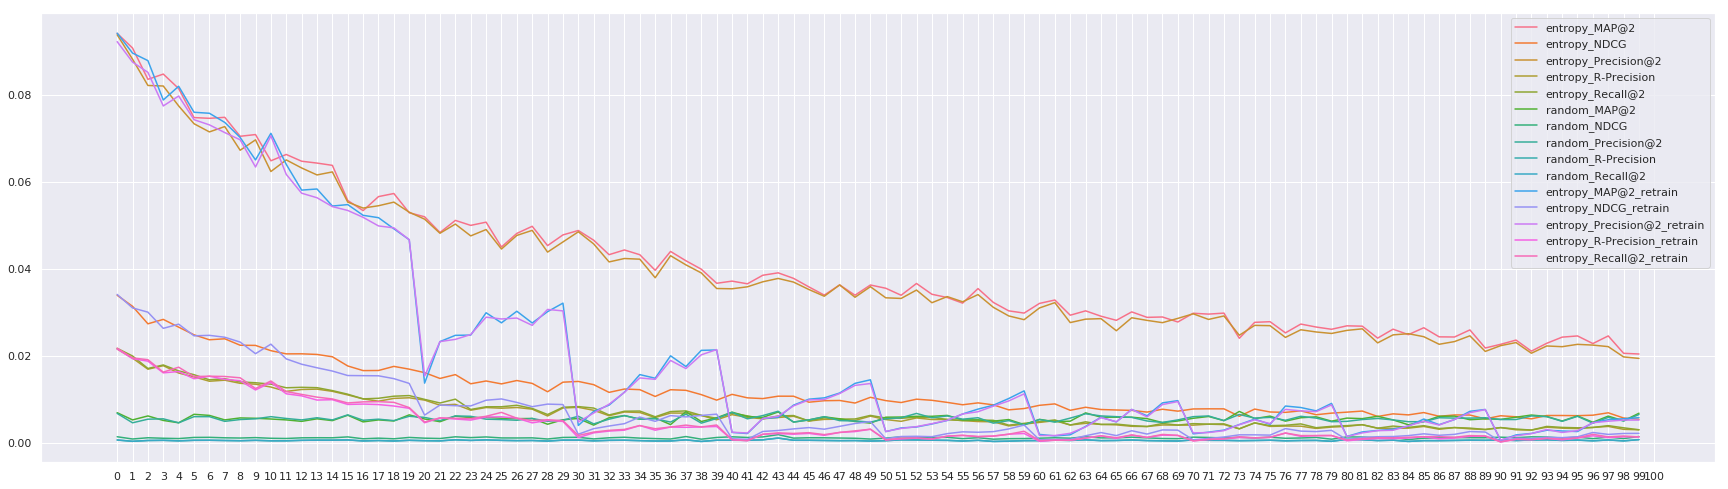

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                                             "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2",
                                                             "entropy_MAP@2_retrain", "entropy_NDCG_retrain", "entropy_Precision@2_retrain", "entropy_R-Precision_retrain", "entropy_Recall@2_retrain"]],
                  dashes=False)
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_with_retrain.png")

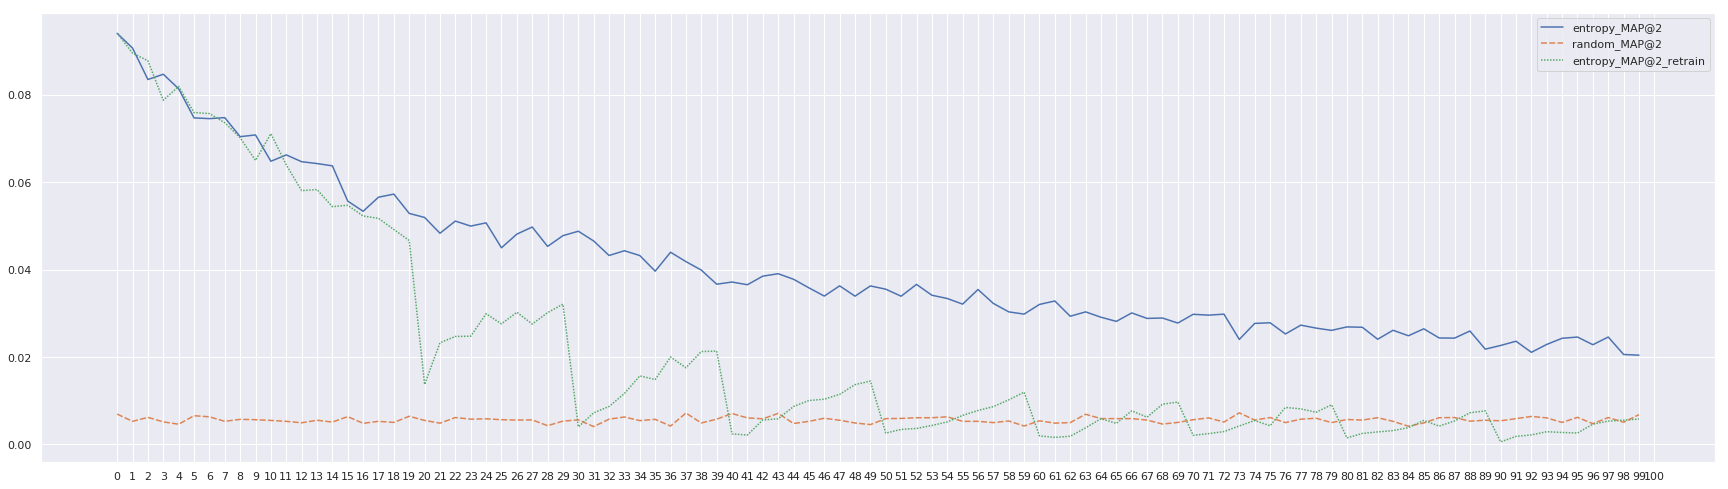

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_MAP@2", "random_MAP@2", "entropy_MAP@2_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_MAP@2_with_retrain.png")

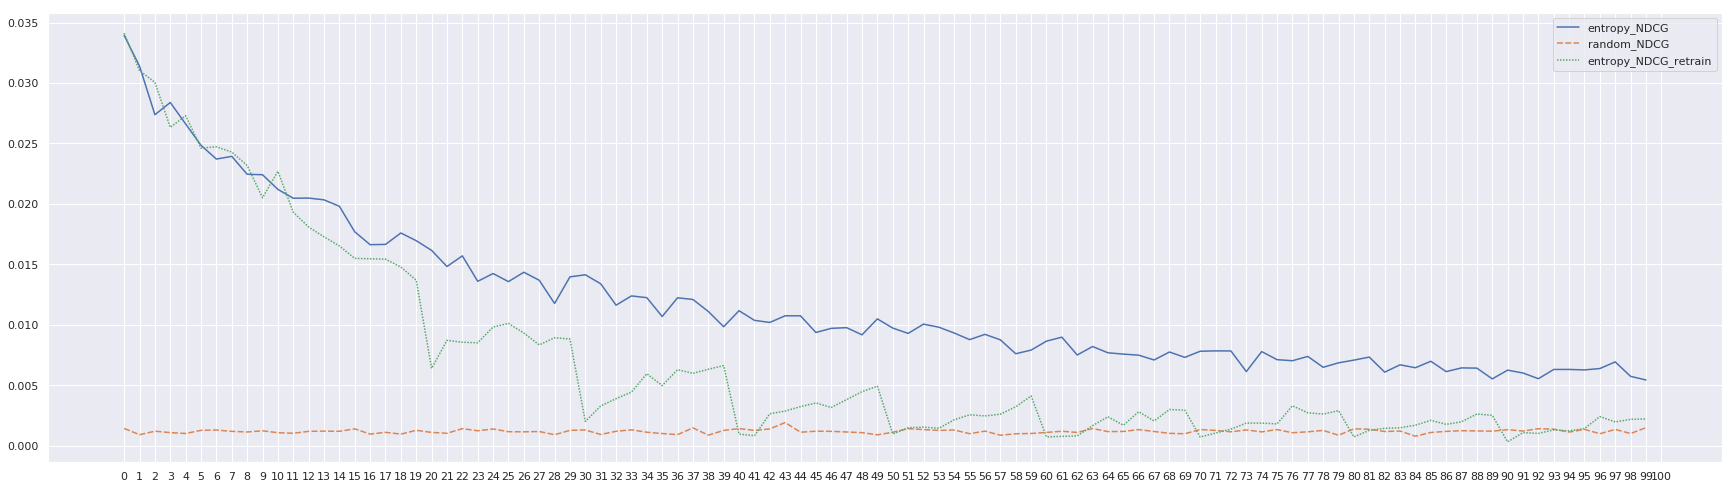

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_NDCG", "random_NDCG", "entropy_NDCG_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_NDCG_with_retrain.png")

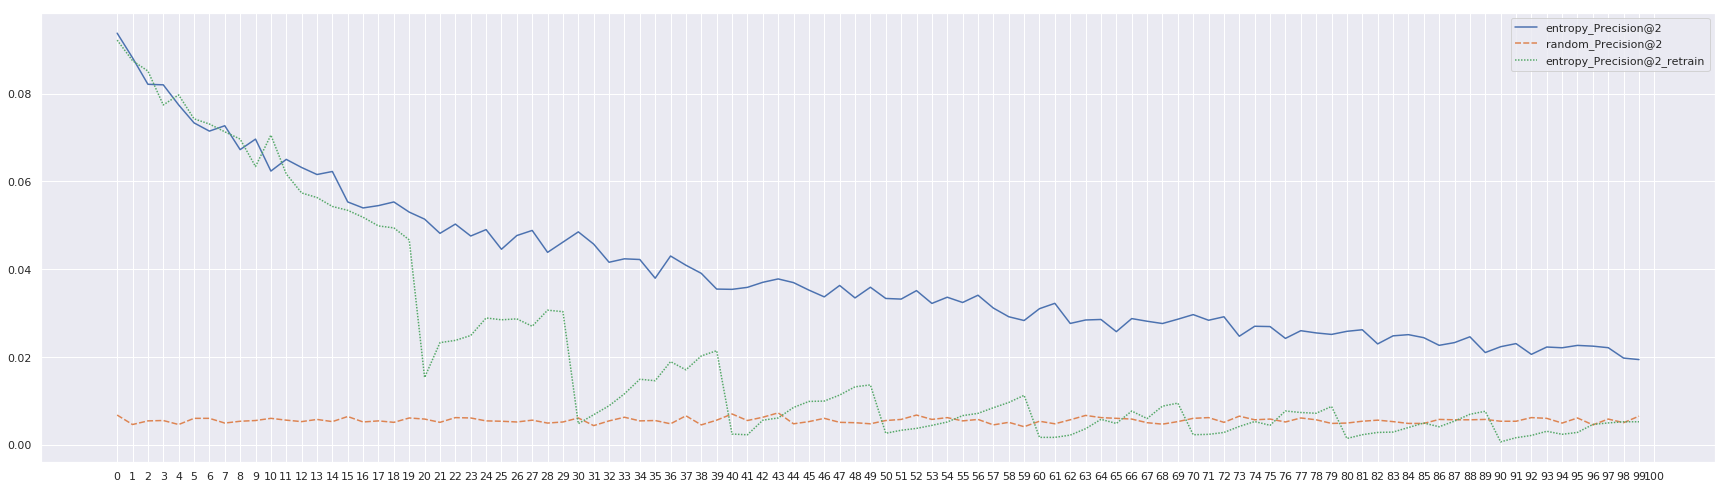

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_Precision@2", "random_Precision@2", "entropy_Precision@2_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Precision@2_with_retrain.png")

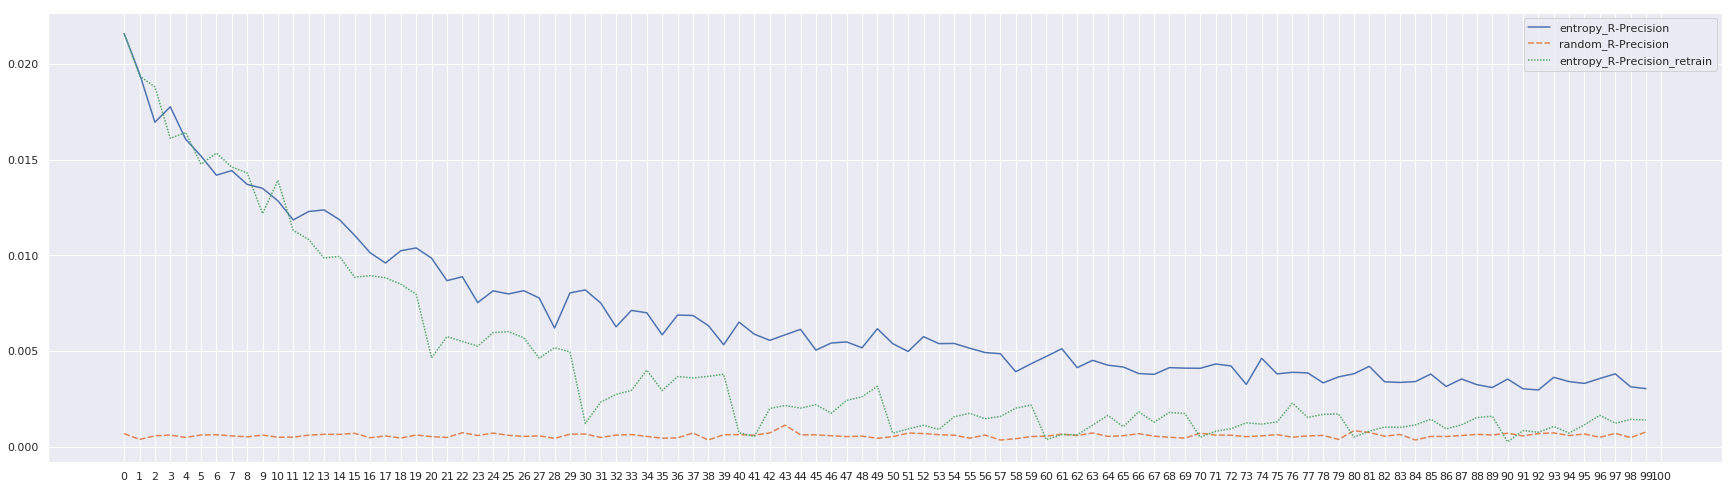

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_R-Precision", "random_R-Precision", "entropy_R-Precision_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_R-Precision_with_retrain.png")

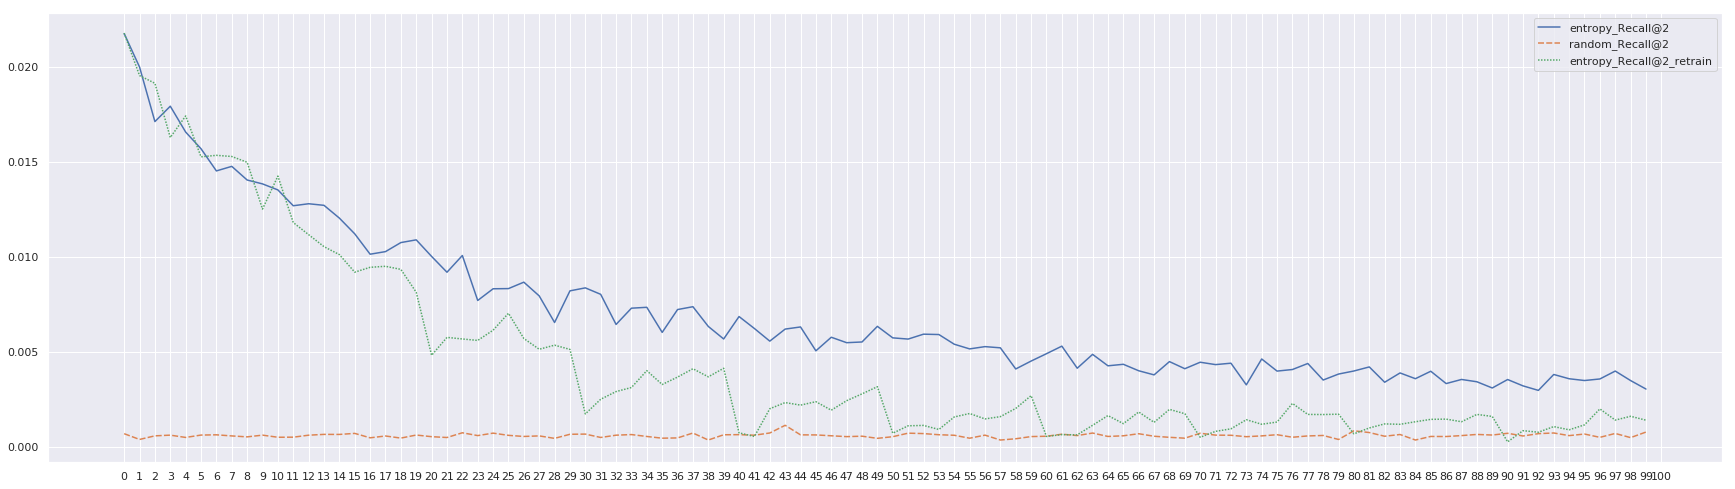

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_Recall@2", "random_Recall@2", "entropy_Recall@2_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Recall@2_with_retrain.png")

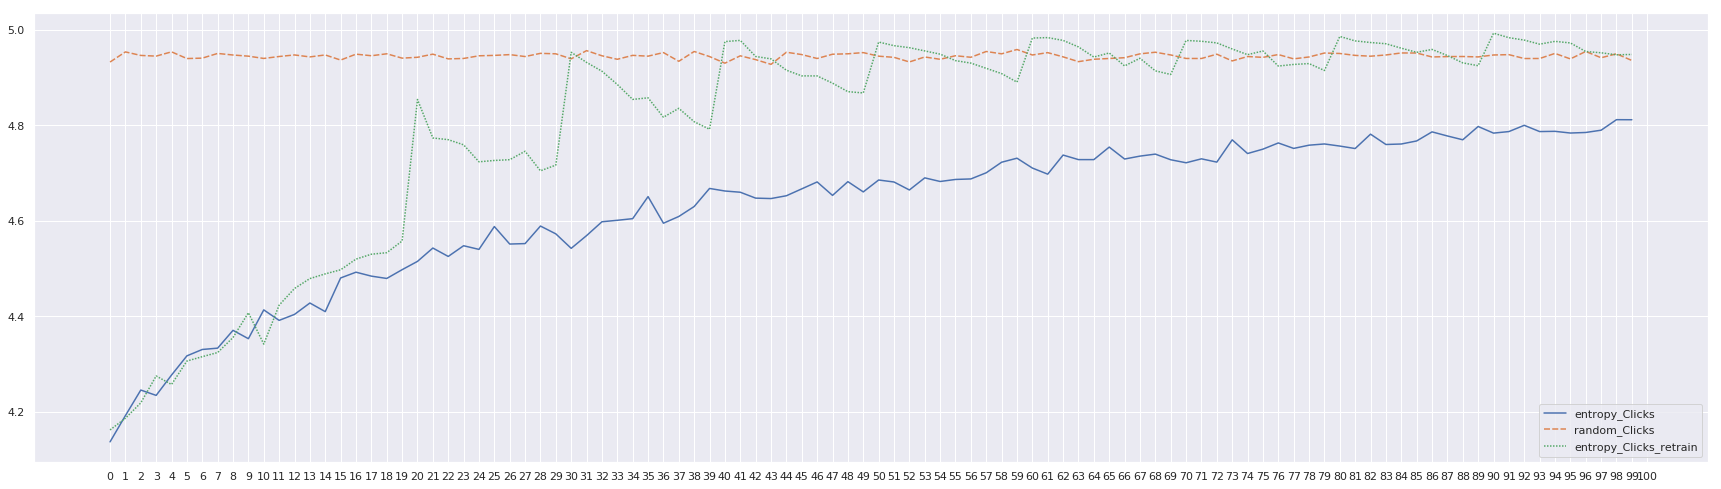

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_Clicks", "random_Clicks", "entropy_Clicks_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Clicks_with_retrain.png")